
1) Exploratory Data Analysis
- Univariate Analysis
    - Check dimension dataset
    - General information and descriptive information
    - <Make innovatiton for EDA>
    - Inconsistencies Analysis
        - Missing Value
        - Duplication
        - Outliers
    - Feature distribution
- Bivariate Analysis
 - Check Feature characteristic and seperation to class
- Multivariate Analysis
 - advanced Correlation Analysis
- Hypothetical Analysis
- Conclusion and Plan for Pre-pro

2) Pre Processing 
- Handling duplications 
- Handling missing values 
- Handling outliers 
- Feature Encoding 
- Feature scaling 
- Feature selection 
- Feature extraction 
- Train and test split 
- Conclusion

3) Modelling 
- KNN - Brute Force 
- KNN - KD Tree 
- Conclusion

In [82]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
np.printoptions(legacy="1.13")

In [83]:
df = pd.read_excel('data.xlsx', sheet_name='Training')

# <div style="background-color:red; color:white; text-align:center; font-family:'Plus Jakarta Sans'; padding:30px; ">Exploratory Data Analysis</div>

In [102]:
df_viz = df.copy()
plt.rcParams['figure.figsize'] = (15, 15)

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">1) Univariate Analysis</div>
**Objective:** Finding pattern, inconsistencies and of each single feature

### **Dimension of Data**

In [103]:
print(f"Total number of rows: {df_viz.shape[0]}")
print(f"Total number Feature: {df_viz.shape[1]}")

Total number of rows: 450
Total number Feature: 18


### **General Information**

In [104]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      450 non-null    int64 
 1   HURUF   426 non-null    object
 2   Z1      450 non-null    int64 
 3   Z2      450 non-null    int64 
 4   Z3      450 non-null    int64 
 5   Z4      450 non-null    int64 
 6   Z5      450 non-null    int64 
 7   Z6      450 non-null    int64 
 8   Z7      450 non-null    int64 
 9   Z8      450 non-null    int64 
 10  Z9      450 non-null    int64 
 11  Z10     450 non-null    int64 
 12  Z11     450 non-null    int64 
 13  Z12     450 non-null    int64 
 14  Z13     450 non-null    int64 
 15  Z14     450 non-null    int64 
 16  Z15     450 non-null    int64 
 17  Z16     450 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 63.4+ KB


Some of feature need to convert to the correct datatype due easiness visualization, like feature of sex, smoking, DEATH_EVENT and other

In [105]:
df_viz.nunique().sort_values()

No        19
HURUF     19
Z13      178
Z16      186
Z9       191
Z5       197
Z7       198
Z12      208
Z11      211
Z6       212
Z8       212
Z2       215
Z15      219
Z4       231
Z10      234
Z1       234
Z14      236
Z3       246
dtype: int64

these features with only 2 unique we will convert to object

### **Inconsistencies Analysis**

#### 1. Missing Value

In [106]:
df_viz.isna().sum()

No        0
HURUF    24
Z1        0
Z2        0
Z3        0
Z4        0
Z5        0
Z6        0
Z7        0
Z8        0
Z9        0
Z10       0
Z11       0
Z12       0
Z13       0
Z14       0
Z15       0
Z16       0
dtype: int64

#### 2. Duplication

In [107]:
df_viz.duplicated().sum()

1

In [108]:
print(f'Percentage of duplicated rows: {(df_viz.duplicated().sum() / len(df_viz)) * 100:.2f}%')

Percentage of duplicated rows: 0.22%


We will handle it directly now, because duplication data is meaningless and less insight

In [109]:
df_viz = df_viz.drop_duplicates()

In [110]:
print(f'Percentage of clean : {( len(df_viz) / len(df)) * 100:.2f}%')
print(f'Total Clean: {len(df_viz)} Rows')

Percentage of clean : 99.78%
Total Clean: 449 Rows


In [111]:
object_data = df_viz.select_dtypes(include='object')
numeric_data = df_viz.select_dtypes(include='number')

#### 3. Outliers Analysis

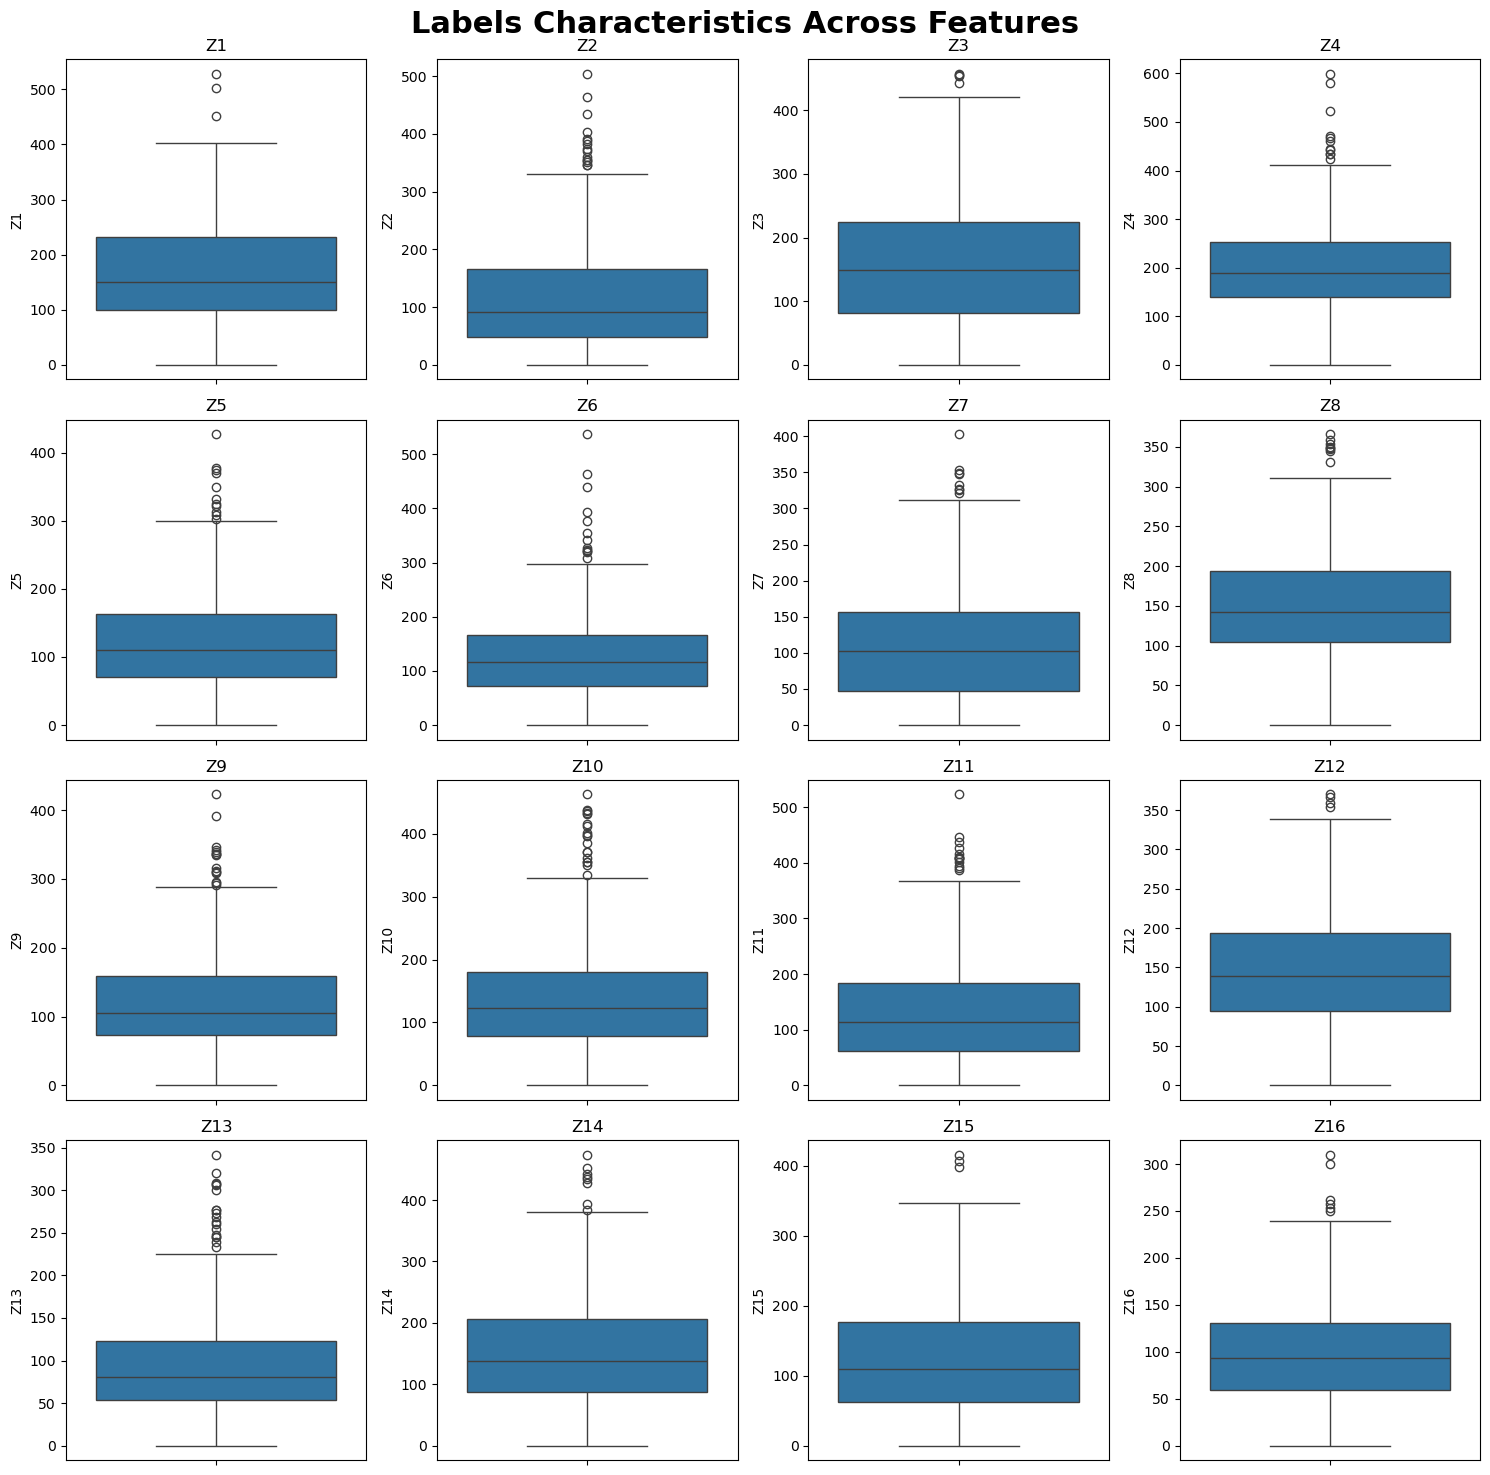

In [112]:
for i, col in enumerate(numeric_data.drop('No', axis=1)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=df_viz, y=col)
    plt.title(f"{col}")
plt.suptitle("Labels Characteristics Across Features", size=22, weight="bold")
plt.tight_layout()
plt.show()

#### IQR Analysis

In [ ]:
def IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers[col].index.tolist()


In [ ]:
print("===========================")
print("Outliers Detection with IQR") 
print("===========================")

total_outliers = 0
for col in numeric_data.columns:

    outliers = IQR(numeric_data, col)
    print(f'Outliers for {col} : {len(outliers)}')
    print(f'Outliers percentage : {len(outliers)/len(numeric_data)*100:.2f}%')
    total_outliers += len(outliers)
    print("--------------------------")


#### Z Score Analysis

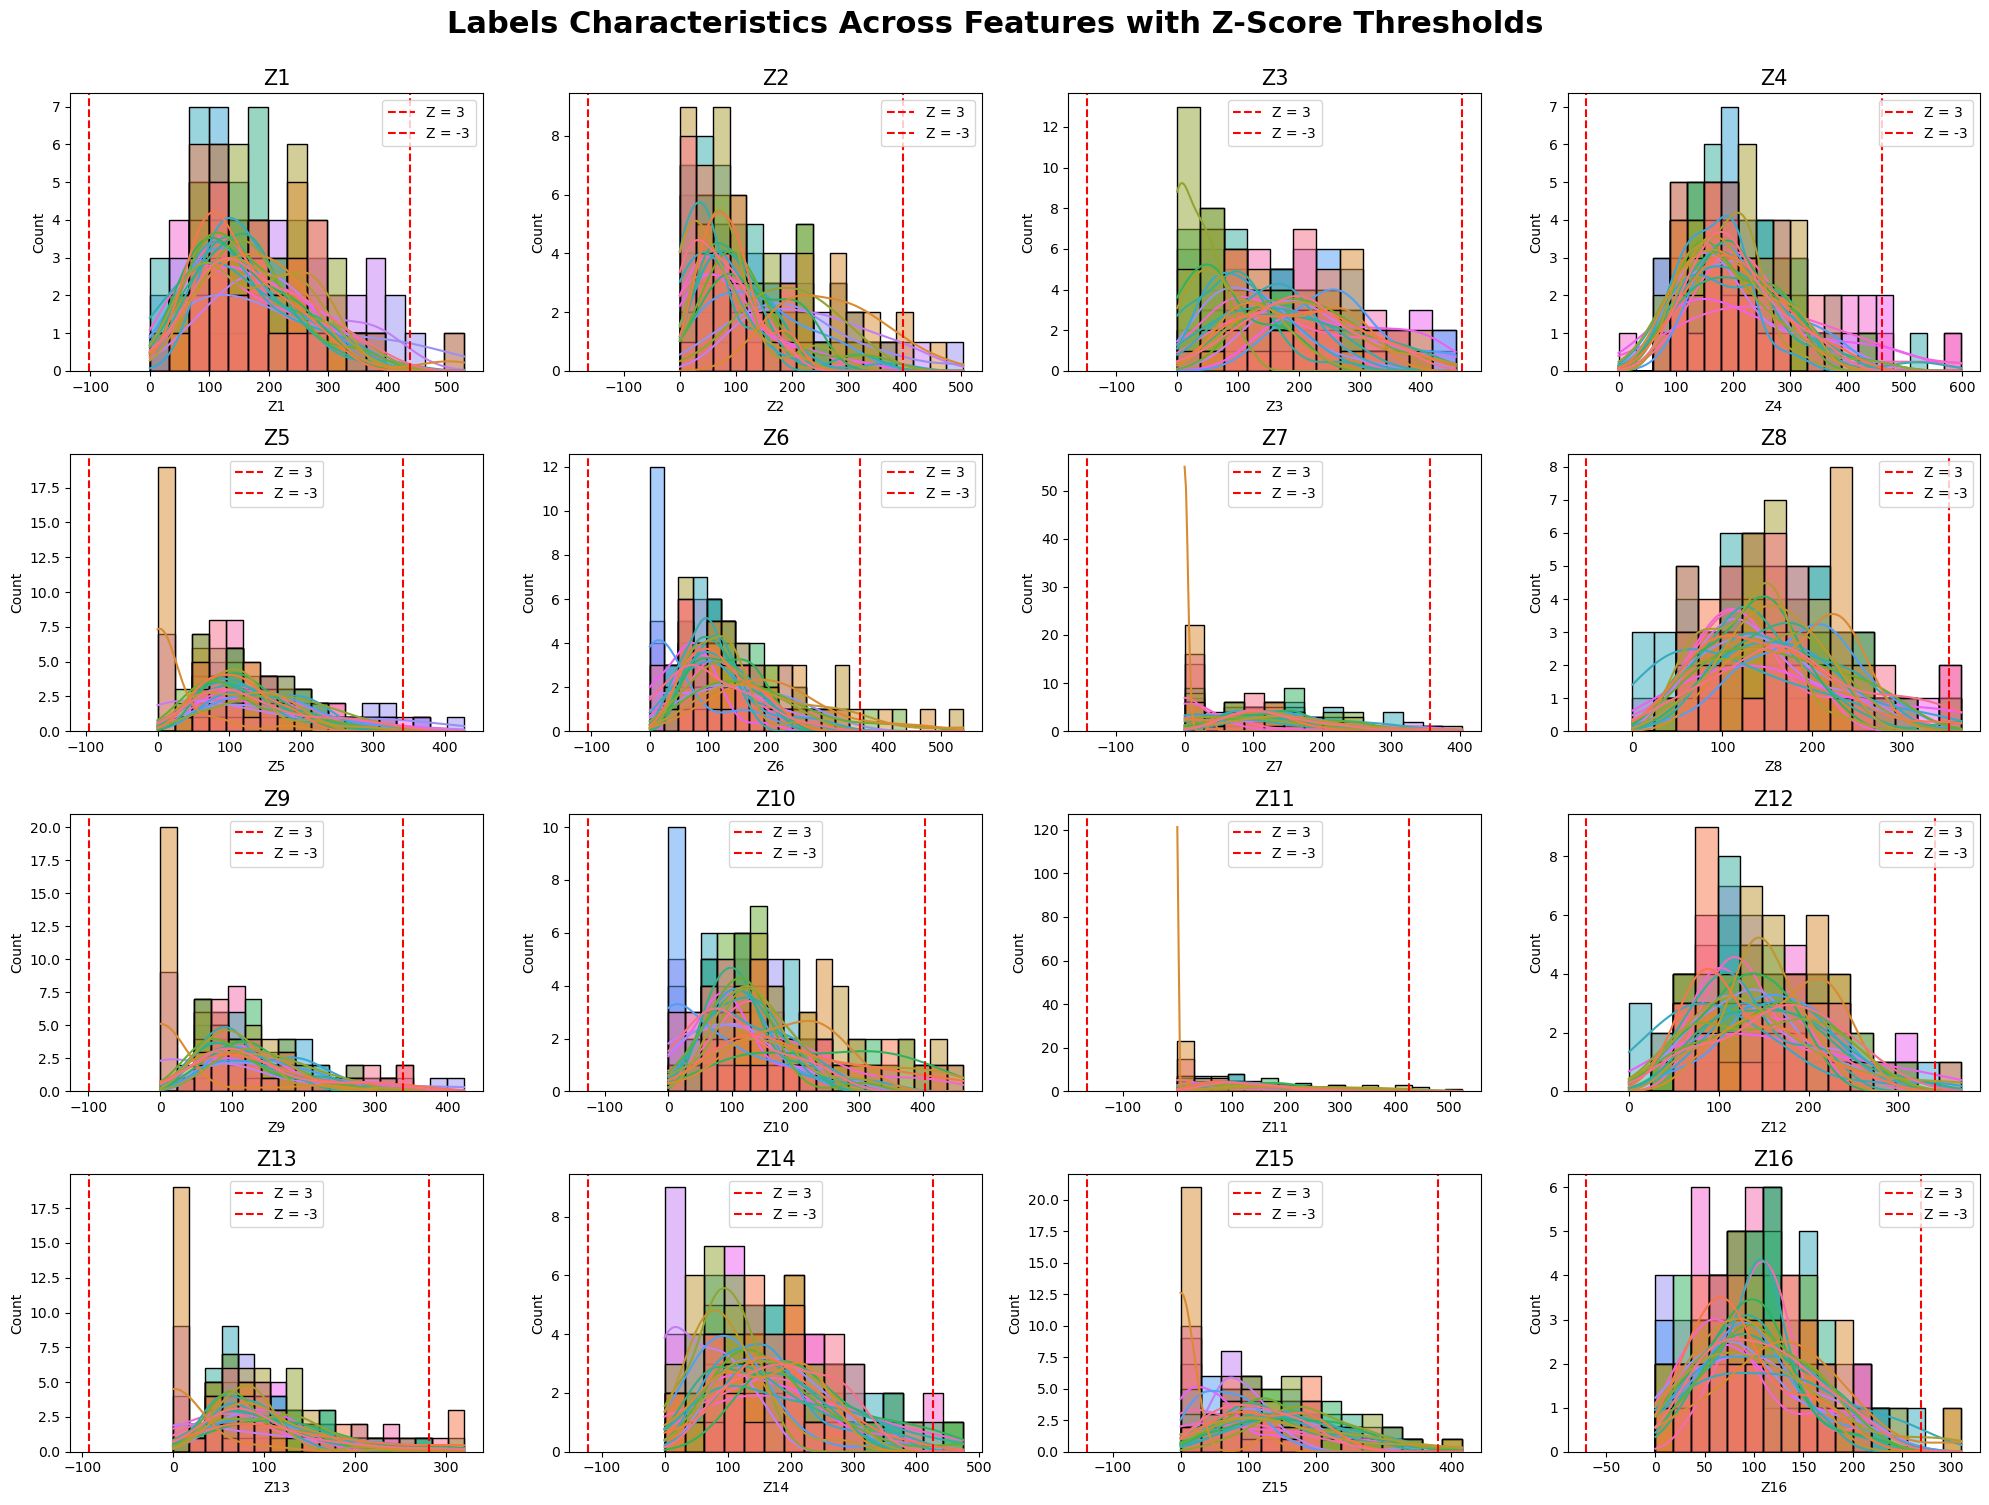

In [98]:
def calculate_zscore(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

for i, col in enumerate(numeric_data.drop('No', axis=1)):
    plt.subplot(4, 4, i+1)
    
    z_scores = calculate_zscore(df_viz[col])
    
    sns.histplot(data=df_viz, x=col, kde=True, hue='HURUF', color='skyblue', edgecolor='black')
    
    plt.axvline(x=np.mean(df_viz[col]) + 3 * np.std(df_viz[col]), color='red', linestyle='--', label='Z = 3')
    plt.axvline(x=np.mean(df_viz[col]) - 3 * np.std(df_viz[col]), color='red', linestyle='--', label='Z = -3')
    
    plt.title(f"{col}", fontsize=15)
    plt.legend()

plt.suptitle("Labels Characteristics Across Features with Z-Score Thresholds", size=22, weight="bold", y=1)

plt.tight_layout()
plt.show()

In [113]:
def Z_score(data, col):
    mean = data[col].mean()
    std = data[col].std()
    threshold = 3

    z_score = (data[col] - mean) / std

    outliers = data[(z_score > threshold) | (z_score < -threshold)]
    return outliers[col].index.tolist()


In [114]:
print("===========================")
print("Outliers Detection with IQR") 
print("===========================")

total_outliers = 0
for col in numeric_data.columns:

    outliers = Z_score(numeric_data, col)
    print(f'Outliers for {col} : {len(outliers)}')
    print(f'Outliers percentage : {len(outliers)/len(numeric_data)*100:.2f}%')
    total_outliers += len(outliers)
    print("--------------------------")


Outliers Detection with IQR
Outliers for No : 0
Outliers percentage : 0.00%
--------------------------
Outliers for Z1 : 3
Outliers percentage : 0.67%
--------------------------
Outliers for Z2 : 4
Outliers percentage : 0.89%
--------------------------
Outliers for Z3 : 0
Outliers percentage : 0.00%
--------------------------
Outliers for Z4 : 5
Outliers percentage : 1.11%
--------------------------
Outliers for Z5 : 5
Outliers percentage : 1.11%
--------------------------
Outliers for Z6 : 5
Outliers percentage : 1.11%
--------------------------
Outliers for Z7 : 1
Outliers percentage : 0.22%
--------------------------
Outliers for Z8 : 3
Outliers percentage : 0.67%
--------------------------
Outliers for Z9 : 5
Outliers percentage : 1.11%
--------------------------
Outliers for Z10 : 7
Outliers percentage : 1.56%
--------------------------
Outliers for Z11 : 4
Outliers percentage : 0.89%
--------------------------
Outliers for Z12 : 4
Outliers percentage : 0.89%
---------------------

<Figure size 1500x1200 with 0 Axes>

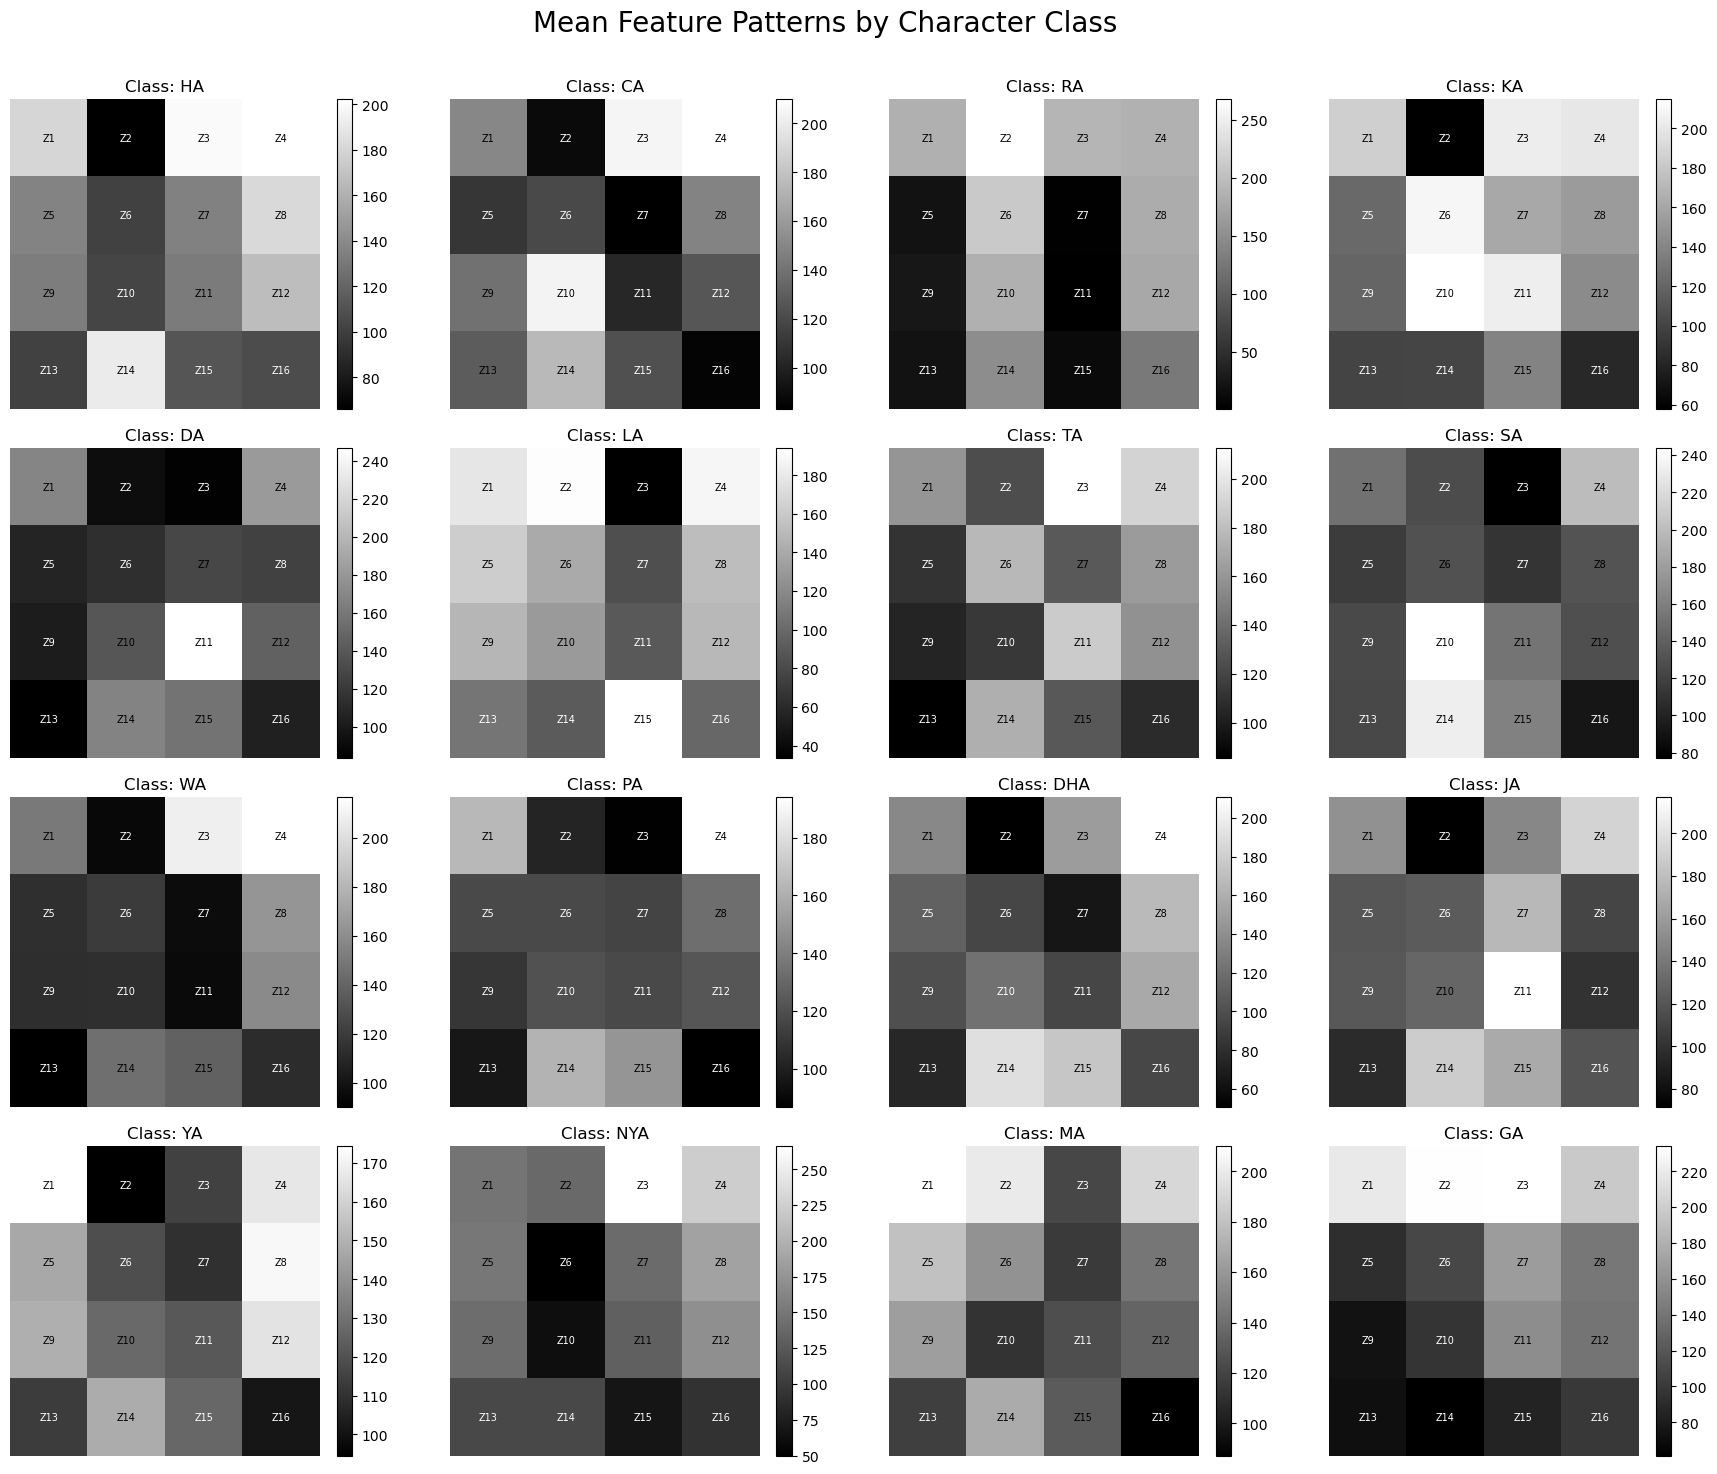

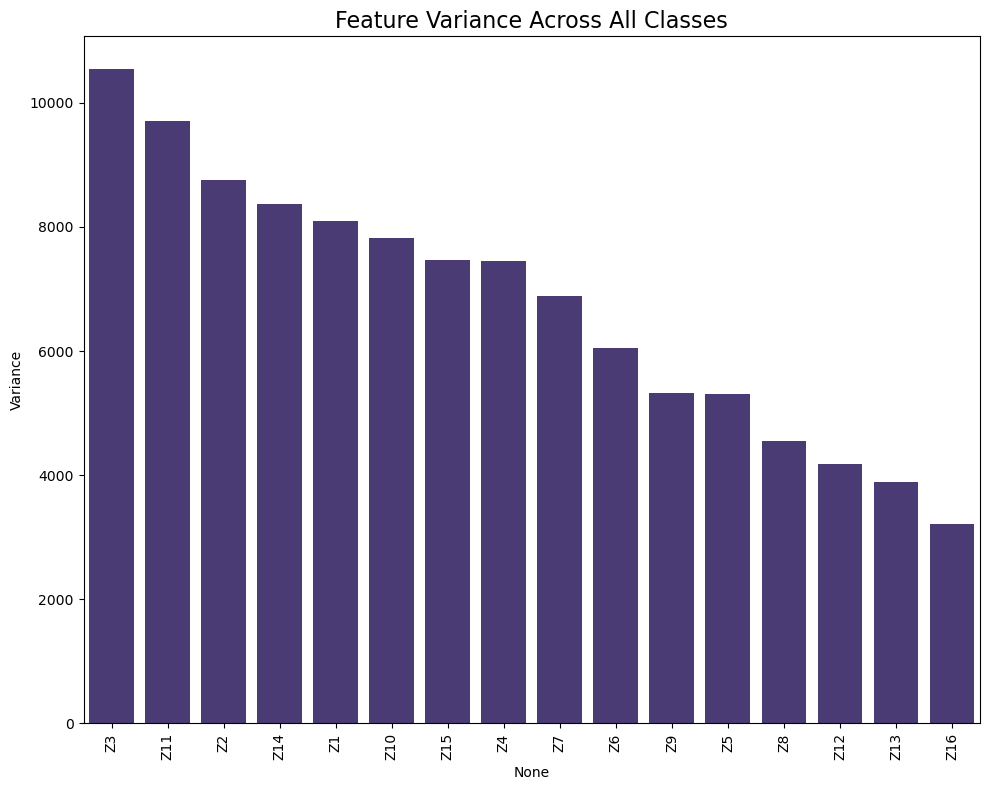

In [145]:
# Create a visualization to understand the mean feature patterns for each character class
plt.figure(figsize=(15, 12))

# Get all unique classes (characters) in order
unique_classes = df_viz['HURUF'].dropna().unique()
num_classes = len(unique_classes)

# Create subplot grid
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot mean feature pattern for each class
for i, class_name in enumerate(unique_classes):
    if i < rows*cols:
        class_data = df_viz[df_viz['HURUF'] == class_name].drop(['No', 'HURUF'], axis=1)
        mean_features = class_data.mean().values
        
        # Reshape to 4x4 grid for visualization
        mean_image = mean_features.reshape(4, 4)
        
        # Display as heatmap
        im = axes[i].imshow(mean_image, cmap='gray')
        axes[i].set_title(f'Class: {class_name}')
        
        # Add feature labels to each cell in the heatmap
        for row in range(4):
            for col in range(4):
                feature_idx = row * 4 + col + 1  # Calculate feature index (1-16)
                # Add text with contrasting color based on cell value
                cell_value = mean_image[row, col]
                text_color = 'black' if cell_value > 127 else 'white'
                axes[i].text(col, row, f'Z{feature_idx}', 
                   ha='center', va='center', color=text_color, fontsize=7)
            
        axes[i].axis('off')
        
        # Add a colorbar for each subplot
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

# Hide any unused subplots
for i in range(len(unique_classes), rows*cols):
    axes[i].axis('off')

plt.suptitle('Mean Feature Patterns by Character Class', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Also create a visualization of feature variance across all classes
plt.figure(figsize=(10, 8))
feature_variance = df_viz.drop(['No', 'HURUF'], axis=1).var()
feature_variance = feature_variance.sort_values(ascending=False)

sns.barplot(x=feature_variance.index, y=feature_variance.values)
plt.title('Feature Variance Across All Classes', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Variance')
plt.tight_layout()
plt.show()

### Insights from Character Feature Visualizations

#### Mean Feature Patterns by Character Class
- Each character class shows a distinct pattern in its feature distribution across the 4x4 grid
- Bright areas (higher values) represent more prominent features for character identification
- Some characters like "GA" and "MA" show concentrated high values in specific regions, indicating distinctive stroke patterns
- Characters with similar visual elements (like "HA" and "CA") show similar intensity distributions
- Darker regions (low values) often represent spaces or areas without strokes in the characters

#### Feature Variance Analysis
- Features Z3, Z11, and Z2 show the highest variance across all characters, making them potentially the most discriminative for classification
- High variance features correspond to areas where character shapes differ most significantly
- Features like Z16, Z13, and Z12 have lower variance, suggesting these areas may be less useful for distinguishing between characters
- Mid-range features may still be important for specific character pairs, even if their overall variance is moderate
- The variance pattern provides guidance for feature selection if dimensionality reduction is required for model optimization

This analysis reveals which spatial regions and corresponding features are most important for accurately classifying Javanese characters, which could inform feature engineering strategies for a classification model.

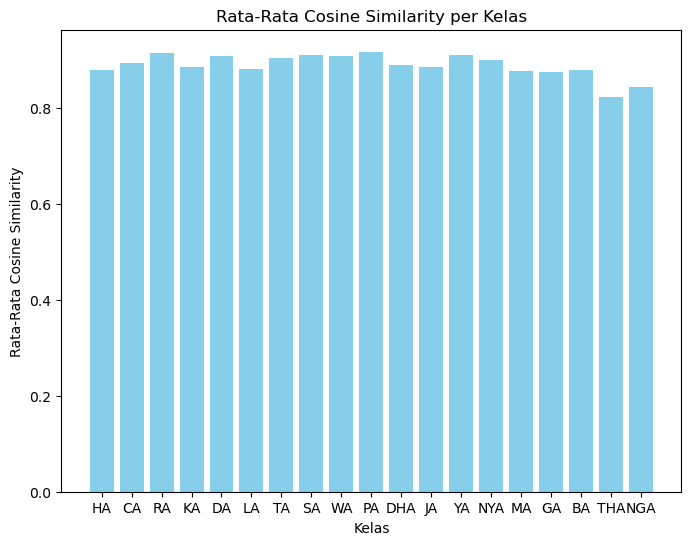

In [141]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Hitung rata-rata cosine similarity per kelas
class_avg_cos_sim = {}
# Filter out any NaN values in HURUF column
valid_classes = df_viz['HURUF'].dropna().unique()

for class_label in valid_classes:
    class_images = df_viz[df_viz['HURUF'] == class_label].drop(columns=['No', 'HURUF']).values
    # Check if we have enough samples to calculate meaningful cosine similarity
    if len(class_images) > 1:
        cos_sim_class = cosine_similarity(class_images)
        # Calculate average similarity from upper triangular part of matrix (excluding diagonal)
        avg_cos_sim = np.mean(cos_sim_class[np.triu_indices_from(cos_sim_class, k=1)])
        class_avg_cos_sim[class_label] = avg_cos_sim
    else:
        print(f"Skipping class {class_label}: insufficient samples ({len(class_images)})")

# Visualisasi rata-rata cosine similarity per kelas
plt.figure(figsize=(8, 6))
plt.bar(class_avg_cos_sim.keys(), class_avg_cos_sim.values(), color='skyblue')
plt.title('Rata-Rata Cosine Similarity per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Rata-Rata Cosine Similarity')
plt.show()

### **Distribution & Characteristic each column**

In [115]:
numeric_desc = numeric_data.describe().T
numeric_desc['nunique'] = [df_viz[col].nunique() for col in numeric_data.columns]
numeric_desc['freq_count'] = [df_viz[col].value_counts().values[0] for col in numeric_data.columns]
numeric_desc['freq'] = [df_viz[col].value_counts().index[0] for col in numeric_data.columns]
display(numeric_desc)

,count,mean,std,min,25%,50%,75%,max,nunique,freq_count,freq
No,449.0,10.151448,5.859535,1.0,5.0,9.0,15.0,20.0,19,46,6
Z1,449.0,167.469933,89.977500,0.0,100.0,151.0,232.0,528.0,234,6,82
Z2,449.0,117.345212,93.599254,0.0,49.0,91.0,166.0,504.0,215,22,0
Z3,449.0,160.086860,102.686672,0.0,81.0,149.0,225.0,457.0,246,20,0
Z4,449.0,202.434298,86.340459,0.0,140.0,189.0,252.0,599.0,231,6,159
Z5,449.0,122.984410,72.912143,0.0,71.0,110.0,163.0,427.0,197,20,0
Z6,449.0,127.282851,77.754752,0.0,73.0,117.0,167.0,537.0,212,16,0
Z7,449.0,107.207127,82.980201,0.0,47.0,102.0,156.0,403.0,198,76,0
Z8,449.0,150.650334,67.423238,0.0,104.0,142.0,194.0,366.0,212,10,123
Z9,449.0,119.592428,73.014101,0.0,73.0,105.0,159.0,423.0,191,28,0


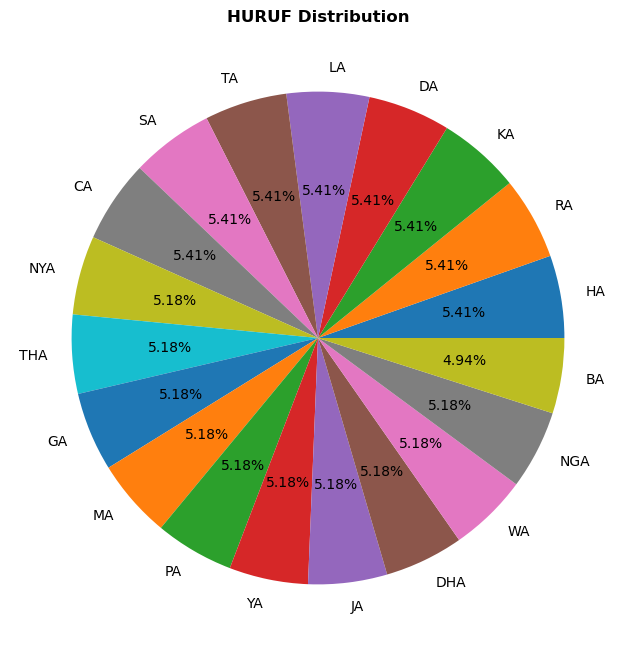

In [117]:
COL = "HURUF"

counts = df_viz[COL].value_counts()
plt.figure(figsize=(10, 8))
plt.title(f"{COL} Distribution", weight="bold")
plt.pie(counts.values, labels=counts.index, autopct="%2.2f%%")
plt.show()

In [129]:
target = 'HURUF'

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">3) Mutivariate Analysis</div>
**Objective:** Finding pattern, inconsistencies and of each single feature

In [130]:
sns.set_palette('viridis')

In [132]:
sns.pairplot(df_viz, hue='HURUF', palette='plasma')
plt.suptitle("Interesting pattern based on analysis", size=52, weight="bold", y=1)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_viz.corr(),fmt=".2g", annot=True)
plt.suptitle("Correlation of each feature", size=52, weight="bold", y=1)
plt.tight_layout()
plt.show()

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">4) Hypothetical Analysis</div>
**Objective:** Finding pattern, inconsistencies and of each single feature

### 1. **Hypotheses**: Female tend to have anemia 👧
#### reasoning: menstruation leads to low red blood cells

In [ ]:
sns.set_palette("Greens")

In [ ]:
filtered = df_viz[(df_viz['sex'] == 0)]
percentage = filtered.shape[0] / df_viz.shape[0] * 100 
print(f"Percentage of female patients: {round(percentage, 2)}%")
display(filtered)

In [ ]:
COL = "diabetes"

counts = filtered[COL].value_counts()
plt.figure(figsize=(10, 8))
plt.title(f"Female Patients - {COL} Distribution", weight="bold")
plt.pie(counts.values, labels=['Yes', 'No'], autopct="%2.2f%%")
plt.show()

it is right, more than half of the female patients have anemia, hypotheses is **ACCEPTED** ✅

---------

### **2. Hypotheses**: 30-50s Male patients tend to smoke 🚬
#### reasoning: smoke tend to be stress relive, while age 30-50s tend to be productive age (working)

In [ ]:
COL = "age"
X = np.array(df_viz[COL])
grouping_X = []

for x in X:
    if x < 20:
        grouping_X.append('teen - early adults')
    elif x < 60:
        grouping_X.append('adults')
    else:
        grouping_X.append('elders')

df_viz['age_group'] = grouping_X
df_viz['age_group'].value_counts() 

most of our patients are elders - 57%, no teen - early adults 

In [ ]:
filtered = df_viz[(df_viz['sex'] == 1) & (df_viz['age_group'] == 'adults')]
percentage = filtered.shape[0] / df_viz.shape[0] * 100 
print(f"Percentage of Male adults: {round(percentage, 2)}%")
display(filtered)

In [ ]:
COL = "smoking"

counts = df_viz[COL].value_counts()
plt.figure(figsize=(10, 8))
plt.title(f"{COL} Distribution", weight="bold")
plt.pie(counts.values, labels=['No', 'Yes'], autopct="%2.2f%%")
plt.show()

turns out only 30% of them smoke, hypotheses is **REJECTED** ❌

---------

### **3. Hypotheses**: Patients with diabetes tend to have kidney malfuncion 🍰
#### reasoning: high amount of glucose may effect kidney function

In [ ]:
COL = "serum_creatinine"
X = np.array(df_viz[COL])
labels = ['low', 'moderate', 'high']
thresholds = np.linspace(X.min(), X.max(), 4)
df_viz['serum_creatinine_group'] = pd.cut(X, bins=thresholds, labels=labels, include_lowest=True)
df_viz['serum_creatinine_group'].value_counts()

In [ ]:
filtered = df_viz[(df_viz['diabetes'] == 1)]
percentage = filtered.shape[0] / df_viz.shape[0] * 100 
print(f"Percentage of Diabetes Patients: {round(percentage, 2)}%")
display(filtered)

In [ ]:
COL = "serum_creatinine_group"

counts = filtered[COL].value_counts()
plt.figure(figsize=(10, 8))
plt.title(f"{COL} Distribution", weight="bold")
plt.pie(counts.values, labels=counts.index, autopct="%2.2f%%")
plt.show()

diabetes dont effect serum_creatinine which effect kidney malfunction, hypotheses is **REJECETED** ❌

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Conclusion & Plan for Pre-Pro</div>

**Technical Insight:**
- Each feature have vary range tha we need to scaling, so some of feature cannot domination
- No missing values 
- 70% duplications 
- feature of have skewness indicate the extream outliers that we can handle

**Domain Knowladge Insight:**
- Most of categorical features have no variance except `high_blood_pressure`
- feature of `time` have most significant can easly seperete the class

*Conclusion in 1 sort term*

# <div style="background-color:red; color:white; text-align:center; font-family:'Plus Jakarta Sans'; padding:30px; ">Pre-processing</div>

objective: preparing the data so it will be ready to be inputed in the models

In [ ]:
df_clean = df.copy()
sns.set_palette('Set1')

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">1) Handling Inconsistencies</div>


### **Handling Duplication**


In [ ]:
df_clean = df_clean.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)

### **Outliers Handling with Z-Score and Winzor**

**Consideration:**
After we know that domain knowladge of this dataset is healthcare and very risk \
We will handle it but still keep the characteristic with winzor (capping)

**Step by Step**:
1) Detect Outliers : Compute Z-Scores for each data point; flag values where ∣Z∣>3.
2) Set Boundaries : Define caps as Mean±3×Standard Deviation.
3) Cap Outliers : Replace extreme values with upper/lower thresholds to limit their impact.
4) Validate : Check statistical properties and visualize to ensure adjustments align with expected ranges.

In [ ]:
def calculate_zscore(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

for i, col in enumerate(numeric_data):
    plt.subplot(4, 3, i+1)
    
    z_scores = calculate_zscore(df_viz[col])
    
    sns.histplot(data=df_viz, x=col, kde=True, hue='DEATH_EVENT', color='skyblue', edgecolor='black')
    
    plt.axvline(x=np.mean(df_viz[col]) + 3 * np.std(df_viz[col]), color='red', linestyle='--', label='Z = 3')
    plt.axvline(x=np.mean(df_viz[col]) - 3 * np.std(df_viz[col]), color='red', linestyle='--', label='Z = -3')
    
    plt.title(f"{col}", fontsize=15)
    plt.legend()

plt.suptitle("Labels Characteristics Across Features with Z-Score Thresholds", size=22, weight="bold", y=1)

plt.tight_layout()
plt.show()

In [ ]:
def winzor_input(data, col, threshold=3):
    # Extract the column data
    valid_data = data[col]
    
    # Calculate mean and standard deviation
    mean = valid_data.mean()
    std = valid_data.std()
    
    # Compute Z-scores
    z_scores = (valid_data - mean) / std
    is_outliers = np.abs(z_scores) > threshold
    outliers_indices = valid_data[is_outliers].index

    # Print outlier information
    if len(outliers_indices) > 0:
        print(f'"{col}" Total {len(outliers_indices)} outliers')
        print(f"Outliers percentage: {(len(outliers_indices) / len(valid_data) * 100):.2f}%")
    else:
        print(f'"{col}" No outliers')
    
    # Define lower and upper bounds for winsorization
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Create a copy of the column values and cast to float64 to avoid dtype issues
    winsorized_values = valid_data.astype(float)
    
    # Apply winsorization
    winsorized_values[winsorized_values < lower_bound] = lower_bound
    winsorized_values[winsorized_values > upper_bound] = upper_bound

    return winsorized_values

# Example usage
print("==============================")
print("Z-Score with Winsorization")
print("==============================")

for col in numeric_data.columns:
    df_clean[col] = winzor_input(df_clean, col)
    print("-----------------------------")

In [ ]:
for i, col in enumerate(numeric_data):
    plt.subplot(4, 3, i+1)
    skew = df_clean[col].skew()
    sns.histplot(data=df_clean, x=col, hue='DEATH_EVENT', kde=True)
    plt.title(f"{col} \n Skew: {skew:.2f}", fontsize=15)
plt.suptitle("Labels Characteristics Across Features", size=22, weight="bold", y=1)
plt.tight_layout()
plt.show()

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">2) Feature Encoding</div>


In [ ]:
def label_encode(data, col):
    unique_categories = data[col].unique()
    category_to_code = {category: code for code, category in enumerate(unique_categories)}

    encoded_col = data[col].map(category_to_code)

    data_encoded = data.copy()
    data_encoded[col] = encoded_col

    return data_encoded[col]

In [ ]:
object_data

In [ ]:
for i, col in enumerate(object_data.drop('DEATH_EVENT', axis=1).columns):
    df_clean[col] = label_encode(df_clean, col)
    df_clean[col] = df_clean[col].astype('int')

In [ ]:
df_clean

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">3) Feature Scaling</div>

In [ ]:

class MinMaxScalar:
    """ A function to scale an array of value to min of 0 and max of 1
    
    Args:
        fit(self, data):
            to fit the data 
            
        transform(self, data):
            to transform the data on range 0 - 1
    """
    
    def __init__(self):
        self.min = None
        self.max = None
    
    def fit(self, data):
        self.min = data.min()
        self.max = data.max()

    def transform(self, data):
        return (data - self.min) / (self.max - self.min)


In [ ]:
MinMaxScalar = MinMaxScalar()

for col in df_clean.drop('DEATH_EVENT', axis=1).columns.tolist():
    MinMaxScalar.fit(df_clean[col])
    df_clean[col] = MinMaxScalar.transform(df_clean[col])

In [ ]:
df_clean.describe().T 

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Feature Selection</div>
**Objective:** Get independent variables / features than can be predictor 

In [ ]:
sns.heatmap(df_clean.corr(numeric_only=True, method="spearman"), annot=True, cmap="Blues")
plt.title("Spearman - Non linear - Correlation", size=20, weight="bold")
plt.show()

#### Top features from **spearman corr**:
1) time 
2) serum_creatinine 
3) ejection_fraction


-----------

### **Mutual Information** 🖋️

**definition**: a method to calc frequency occurance of independent and dependent values 

**indicator**: high mutual info score == high frequency 

**strength**: individual feature values occurance with dependent 

**weakness**: bad on small samples 

In [ ]:
def mutual_information(crosstab):
    """ A function to perform mutual information, method to measure uncertainty / frequency occurance of independent and dependent values 

    Args:
        crosstab (pandas crosstab): a joint marginal / probability of independent and dependent values

    Returns:
        array: an array of mutual information scores 
    """
    
    observed = np.array(crosstab.iloc[:-1, :-1])
    ratio = observed / np.sum(observed)
    Px = np.sum(ratio, axis=1, keepdims=True)
    Py = np.sum(ratio, axis=0, keepdims=True)
    nonzero = ratio > 0 
    MI = np.sum(ratio[nonzero] * np.log(ratio[nonzero] / (Px @ Py)[nonzero]))
    return MI

#### uses euler exponent to get natural binning based on total instances 

In [ ]:
binning = int(np.log(len(df_clean)) + 1)
print(f"Natural binning with 'euler' number: {binning} Groups")

#### continu values need to be group

In [ ]:
continu_cols = df_clean.nunique()[df_clean.nunique() > binning].index.tolist()
discrete_cols = df_clean.nunique()[df_clean.nunique() <= binning].index.tolist()

print(f"{len(continu_cols)} continu cols: {continu_cols}")
print(f"{len(discrete_cols)} discrete cols: {discrete_cols}")

In [ ]:
def compute_MI(data, cols, target, continu_cols, binning):
    """ A function to perform mutual information through all columns

    Args:
        data (dataframe): the selected dataframe
        cols (array): an array of columns
        target (string): name of the target 
        continu_cols (array): an array of continu columns
        binning (int): number of natural groups

    Returns:
        array: an array of mutual information scores of all columns 
    """
    
    MI_scores = []
    
    # get mutual information of all columns
    for col in cols:
        X = np.array(data[col])
        
        # grouping continu cols 
        if col in continu_cols:
            X = np.digitize(X, bins=np.linspace(X.min(), X.max(), binning))
            
        # get joint marginal and compute the mutual info
        X = pd.DataFrame(X.T)
        crosstab = pd.crosstab(X[0], data[target], margins=True) # joint marginal
        MI_score = mutual_information(crosstab)
        MI_scores.append(MI_score)
        
        if col == target:
            plt.figure(figsize=(10, 8))
            sns.heatmap(crosstab.iloc[:-1, :-1], annot=True, fmt="d", cmap="Blues")
            plt.suptitle(f"Joint Marginal / Probability of {target}", size=17, weight="bold", ha="center", va="center")
            plt.title(f"Mutual info score: {round(MI_score, 4)}")
            plt.show()
    return MI_scores

In [ ]:
MI_scores = compute_MI(df_clean, df_clean.columns.tolist(), target, continu_cols, binning)

the maximum mutual information score is **0.6115**

In [ ]:
indices = np.argsort(MI_scores)[::-1]
MI_scores = np.array(MI_scores)[indices]
cols_names = np.array(df_clean.columns.tolist())[indices]

In [ ]:
for col, mi in zip(cols_names, MI_scores):
    print(f"{col}: {round(mi, 4)}")

#### Top features from **mutual information**:
1) time 
2) ejection_fraction 
3) serum_creatinine


-----------

### **Recursive Feature Elimination** 🖋️

**definition**: a method to get best subsets of features by eliminating unmeaningful features

**indicator**: unmeaningful features == don't effect model's acc

**strength**:  capture interaction of features 

**weakness**: bad on runtime (slow)

In [ ]:
def recursive_feature_elimination(X, y, model, test_size, kfolds, sampling, accuracy_key, min_features=2, cols=None):
    """ A function to get the best subset of features by eliminating unmeaningful ones

    Args:
        X (array): an array of indepent variable's values
        y (array): an array of dependent variable's values
        model (object): the object of the model / algorithm
        test_size (float): the testing ratio 
        kfolds (int): number of folds 
        sampling (function): function for the sampling method
        accuracy_key (string): name of the accuracy key 
        min_features (int, optional): number of minimum features in subset. Defaults to 2.
        cols (array, optional): an array of columns. Defaults to None.

    Returns:
        arrays: an array of best subset features and an array of tracked worst features 
    """
    
    remaining_features = list(range(X.shape[1]))
    best_score = 0
    best_features = remaining_features[:]
    worst_features = []
    
    print("==============================")
    print("Recursive Feature Elimination")
    print("==============================\n")
    
    while len(remaining_features) > min_features:
        scores = []
        
        for feature in remaining_features:
            temp_features = [f for f in remaining_features if f != feature]
            data = sampling(X[:, temp_features], y,  model, test_size, kfolds)
            avg_accuracy = np.mean(data[accuracy_key])
            scores.append((feature, avg_accuracy))
            
        scores.sort(key = lambda x: x[1])
        worst_feature = scores[-1][0]
        worst_features.append((worst_feature, scores[-1][1]))
        

        print(f"Worst feature: {np.array(cols)[worst_feature]}")
        print(f"Accuracy: {scores[-1][1]}")
        print(f"Current subset {len(remaining_features)}: {np.array(cols)[remaining_features]}")
        remaining_features.remove(worst_feature)
        print("-----------------------------------")
        
        if scores[-1][1] >= best_score:
            best_score = scores[-1][1]
            best_features = remaining_features[:]
            
    return best_features, worst_features
            

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Feature Extraction</div>
**Objective:** Generate New Features by PCA and Ratio Complexity 

### **Principal Compoennt Analysis** 🖋️

**definition**: a method to get most of the variance / information of feature 

**indicator**: high variance == high information == tend to seperate well

**strength**: lower influence of redundant features, lower dimensionality

**weakness**: bad on low dimension datasets

In [ ]:
class PCA:
    """ A function to reduce dimension and lower redundant information influence by making new features
    
    Args:
        n_components (int): number of components 
        mean (float): mean of the inputed data 
        components (array): an array of the new feature's direction (eigenvector)
        explained_vairance (array): an array of variance for each new features (eigenvalues)
        
    Methods:
        fit(self, X):
            to fit the data 
        
        transform(self, X):
            to tranform the data based on new direction and variance 
    
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None 
        self.components = None 
        self.explained_variance = None 
        
    def fit(self, X):
        self.mean = X.mean()
        X_centered = X - self.mean
        
        cov = np.cov(X_centered.T)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[:, indices]
        
        self.components = eigenvectors[:, :self.n_components].T 
        self.explained_variance = eigenvalues
        
    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

In [ ]:
pca = PCA(3)
pca.fit(df_clean.drop(target, axis=1).values)
transform_pca = pca.transform(df_clean.drop(target, axis=1).values)

In [ ]:
columns_pca = [f"PC{i}" for i in range(1, df_clean.shape[1] )]
df_clean_pca = pd.DataFrame(transform_pca, columns=columns_pca[:3])
df_clean_pca['DEATH_EVENT'] = df_clean['DEATH_EVENT']
df_clean_pca.to_csv('pca.csv')

In [ ]:
df_clean_pca.head()

In [ ]:
plt.figure(figsize=(15, 5))
ratio_explained_variance = pca.explained_variance / np.sum(pca.explained_variance) * 100
sns.barplot(y=ratio_explained_variance, x=columns_pca, hue=columns_pca, palette="plasma")
plt.title('Explained Variance | Information')
plt.show()

In [ ]:
features = df_clean.drop(target, axis=1).columns.tolist()
print("=== Feature Influence to Principal Components ===\n")
for i, component in enumerate(pca.components):
    print(f"PC{i+1}")
    indices = np.argsort(component)[::-1]
    for idx in indices[:3]:
        print(f"{features[idx]}: {round(component[idx], 7)}")
    print("=======================================")
        

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Train and Test Split</div>
**Objective:** split the dataset into training and testing set 

- stratified sampling: for hyperparameter tuning 
- stratified cross validation: models

In [ ]:
def accuracy_score(y_pred, y_test):
    return np.mean(y_pred == y_test) * 100

In [ ]:
def stratified_cross_validation(X, y, model, test_size, kfolds=None, train_acc=False, print_fold=False):
    """ a function to perform combos of training and testing ratios by considering class ratio as well

    Args:
        X (array): an array of indepent variable's values
        y (array): an array of dependent variable's values
        model (object): the object of the model / algorithm
        test_size (float): the testing ratio 
        kfolds (int): number of folds
        train_acc (bool, optional): compute the training accuracy or not. Defaults to False.

    Returns:
        dict: components of last iteration
    """
    
    unique_classes = np.unique(y)
    class_indices = {cls: np.where(y == cls)[0] for cls in unique_classes}
    
    if kfolds is None:
        kfolds = int(len(X) / (len(X) * test_size))
    
    folds = [[] for i in range(kfolds)]
    accuracies_test = []
    accuracies_train = []
    
    for cls, indices in class_indices.items():
        np.random.shuffle(indices)
        split_sizes = [int(len(indices) * test_size)] * kfolds 
        for i in range(len(indices) % kfolds):
            split_sizes[i] += 1
            
        start = 0 
        for i in range(kfolds):
            end = start + split_sizes[i]
            folds[i].extend(indices[start:end])
            start = end 
            
    for i in range(kfolds):
        test_indices = folds[i]
        train_indices = [idx for fold in folds if fold != folds[i] for idx in fold]
        
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_pred_test, y_test)
        accuracies_test.append(accuracy_test)
        
        y_pred_train = []
        accuracy_train = 0
        if train_acc:
            y_pred_train = model.predict(X_train)
            accuracy_train = accuracy_score(y_pred_train, y_train)
            accuracies_train.append(accuracy_train)
            
        if print_fold: 
            print(f"fold: {i+1} | test acc: {accuracy_test:.2f} | train acc: {accuracy_train:.2f}")
            
    data = {
        'test_indices': test_indices, 'train_indices': train_indices,
        'y_pred_test': y_pred_test, 'y_pred_train': y_pred_train,
        'accuracies_test': accuracies_test, 'accuracies_train': accuracies_train
    }
        
    return data 

In [ ]:
def stratified_sampling(X, y, model, test_size, kfolds=None, train_acc=False):
    """ A function to split training and testing set by considering class ratio 

    Args:
        X (array): an array of indepent variable's values
        y (array): an array of dependent variable's values
        model (object): the object of the model / algorithm
        test_size (float): the testing ratio 
        kfolds (int): number of folds
        train_acc (bool, optional): compute the training accuracy or not. Defaults to False.

    Returns:
        dict: components of splitting
    """
    
    unique_classes = np.unique(y)
    class_indices = {cls: np.where(y == cls)[0] for cls in unique_classes}
    
    test_indices = []
    train_indices = []
    
    for cls, indices in class_indices.items():
        np.random.shuffle(indices)
        n_test = int(len(indices) * test_size)
        test_indices.extend(indices[:n_test])
        train_indices.extend(indices[n_test:])
        
    test_indices = np.array(test_indices)
    train_indices = np.array(train_indices)
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    accuracies_test = accuracy_score(y_pred_test, y_test)
    
    y_pred_train = []
    accuracies_train = 0
    if train_acc:
        y_pred_train = model.predict(X_train)
        accuracies_train = accuracy_score(y_pred_train, y_train)
        
    data = {
        'test_indices': test_indices, 'train_indices': train_indices,
        'y_pred_test': y_pred_test, 'y_pred_train': y_pred_train,
        'accuracies_test': [accuracies_test], 'accuracies_train': [accuracies_train]
    }
        
    return data 

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Saving to CSV</div>
**Objective:** the pre processing data is saved to a csv file 

In [ ]:
df_clean.to_csv('dataset_clean.csv')

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Conclusion & Plan for Modelling</div>

**Technical Insight:**
- Cleaned from outliers 
- Scaled to 0 - 1 for all feature 
- New Features by PCA (principal component analysis)

**Domain Knowladge Insight:**
- best features spearman: time, ejection_fraction, serum_creatinine
- best features mutual info: time, ejection_fraction, serum_creatinine
- best features rfe: later in modelling
- PCA won't be used because it fails to capture the information

#### *Conclusion: data is cleaned, and ready to be used in modelling*

# <div style="background-color:red; color:white; text-align:center; font-family:'Plus Jakarta Sans'; padding:30px; ">Modeling</div>

## **Define the distance metrics**

In [ ]:
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski(x1, x2, p=1.5):
    return np.sum(np.abs(x1 - x2) ** p) ** (1/p)

def counter(iteratable):
    counts = {}
    for item in iteratable:
        counts[item] = counts.get(item, 0) + 1
    return counts 

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">1) KNN - Brute Force</div>

**Step by Step Predict:**

*Step 1: Store all the training points*

**Step by Step Predict:**

*Step 1*: Calculates x to all data point in train data\
*Step 2*: Sort the nearest neighbors based on K \
*Step 3*: Vote Majority voting in inside K \

**Strength:**
- Best for small dataset
- No training phase
- simple to implement

**Weakness:**
- High computational cost
- not scalable for instant prediction
- sensitive to noise and irrelevant feature

In [ ]:
class KNN:
    def __init__(self, k=3, distance=euclidean, weighted=False):
        self.k = k
        self.distance = distance
        self.weighted = weighted
    
    def fit(self, X, y):
        # fit training points and labels
        self.X_train = X
        self.y_train = y

    def _predict(self, x):
        # compute distances of input data to the training points
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        
        # get the k nearest labels
        indices = np.argsort(distances)[:self.k]
        nearest_labels = [self.y_train[i] for i in indices]
        
        # vote based on distance 
        if self.weighted:
            nearest_distances = [distances[i] for i in indices]
            labels_weight = {label: 0 for label in set(nearest_labels)}
            for i, label in enumerate(nearest_labels):
                weight = 1 / (nearest_distances[i] + 1e-7)
                labels_weight[label] += weight
            return labels_weight
        
        # vote based on frequency
        else: 
            labels_count = counter(nearest_labels)
            return labels_count
    
    def predict(self, X):
        predictions = []
        
        # iterate through all input points
        for x in X:
            # get the votes
            votes = self._predict(x)
            
            # get the top label with most frequency / weight
            top_index = np.argmax(list(votes.values()))
            top_label = np.array(list(votes.keys()))[top_index]
            predictions.append(top_label)
        return predictions

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">2) KNN - KD Tree</div>

**Step By Step Building:**

*Step 1: get median index*\
*Step 2: split into left and right based on median index*\
*Step 3: repeat step 1-2 until..*\
*Step 4: reached leaf_size or become homegen*

**Step By Step Predict:**

*Step 1: start from root*\
*Step 2: determine next nodes to travel* \
*Step 3: track travelled nodes as nearest neighbors*\
*Step 4: repeat step 1-3 until..*\
*Step 5: reached leaf node*\
*Step 6: check if point is near to opposite nodes* \
*Step 7: compare with farthest nearest neighbors* \
*Step 8: if yes, travel, else skip*\
*Step 9: return final nearest neighbors*


**Strength:**
- Efficiency neighbors search 
- Fast computation: O(log(n))

**Weakness**
- perform bad on high dimension data 
- perform bad on high leaf size 

In [ ]:
class KDTree:
    class Node:
        def __init__(self, index, point, label, left=None, right=None):
            self.index = index
            self.point = point 
            self.label = label 
            self.left = left 
            self.right = right 
            
    def __init__(self, k=3, distance=euclidean, leaf_size=5, weighted=False):
        self.k = k 
        self.distance = distance 
        self.leaf_size = leaf_size
        self.root = None 
        self.visited_nodes = []
        self.weighted = weighted
        
    def build_tree(self, indices, points, labels, depth=0):
        # base case: if no points left, tree has ended, return nothing 
        if len(points) == 0:
            return None 
        
        # if points below/equal to leaf_size, no further splitting, convert into leaf node
        if len(points) <= self.leaf_size:
            labels_count = counter(labels)
            top_index = np.argmax(list(labels_count.values()))
            top_label = np.array(list(labels_count.keys()))[top_index]
            return self.Node(indices[0], points[0], top_label)
        
        # axis cycle, level-wise, ex: X -> Y -> Z -> X
        axis = depth % points.shape[1]
        
        # sort the points based on current axis 
        sorted_indices = np.argsort(points[:, axis])
        
        # get median index and median point 
        median_idx = len(indices) // 2
        median_point = sorted_indices[median_idx]
        
        # split dataset into left and right based on median index 
        left_indices = sorted_indices[:median_idx] # below/equal median index
        right_indices = sorted_indices[median_idx+1:] # above median index
        
        # make the subtrees / childs 
        left_subtree = self.build_tree(indices[left_indices], points[left_indices], labels[left_indices])
        right_subtree = self.build_tree(indices[right_indices], points[right_indices], labels[right_indices])
        
        return self.Node(
            indices[median_point],
            points[median_point],
            labels[median_point],
            left_subtree,
            right_subtree
        )
        
    def nearest_neighbors(self, tree, query, k, depth=0, best=None):
        # base case: if tree is none, tree has ended, return nearest neighbors (best) 
        if tree is None:
            return best 
        
        # if best is None, initailize it 
        if best is None:
            best = []
           
        # if the current tree contains nearer point than the farthest nearest neighbors 
        if len(best) < k or (len(best) > 0 and self.distance(tree.point, query) < self.distance(best[-1].point, query)):
            # add the node as nearest neighbors and sort it from the 'nearest to farthest'
            best.append(tree)
            best.sort(key = lambda node: self.distance(node.point, query)) 
            # if best exceed k, remove farthest neighbor 
            if len(best) > k:
                best.pop()
                
        self.visited_nodes.append(tree.index)
                
        # axis cycle, leaf-wise, ex: X -> Y -> Z -> X
        axis = depth % len(query)
        
        # deterine the next branch to travel 
        next_branch = tree.left if query[axis] < tree.point[axis] else tree.right
        opposite_branch = tree.right if query[axis] < tree.point[axis] else tree.left  
        
        # assign as the nearest neighbor 
        best = self.nearest_neighbors(next_branch, query, k, depth+1, best)
        
        if len(best) < k or np.abs(tree.point[axis] - query[axis]) < self.distance(best[-1].point, query):
            best = self.nearest_neighbors(opposite_branch, query, k, depth+1, best)
            
        return best 
    
    def fit(self, X, y):
        indices = np.arange(X.shape[0])
        self.root = self.build_tree(indices, X, y)
        
    def predict(self, X):
        predictions = []
        
        # iterate through all points
        for x in X:
            nearest_neighbors = self.nearest_neighbors(self.root, x, self.k)
            
            # if weighted true, voting is based on the nearest neighbors' distance
            if self.weighted:
                unique_labels = set([neighbor.label for neighbor in nearest_neighbors])
                labels_weight = {label: 0 for label in unique_labels}
                for neighbor in nearest_neighbors:
                    distance = self.distance(neighbor.point, x)
                    weight = 1 / (distance + 1e-7)
                    labels_weight[neighbor.label] += weight 
                top_index = np.argmax(list(labels_weight.values()))
                top_label = np.array(list(labels_weight.keys()))[top_index]
                predictions.append(top_label)
            
            # else, voting is based on the nearest neighbors' frequency
            else:
                labels_count = counter([neighbor.label for neighbor in nearest_neighbors])
                top_index = np.argmax(list(labels_count.values()))
                top_label = np.array(list(labels_count.keys()))[top_index]
                predictions.append(top_label)
                
        return predictions
            

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Implemetation of RFE</div></div>

**Objective:** Recursive Feature Elimination -- Finding best subset of feature that give best accuracy

In [ ]:
X = df_clean.drop('DEATH_EVENT', axis=1).values
y = df_clean['DEATH_EVENT'].values

In [ ]:
selected_cols = df_clean.drop('DEATH_EVENT', axis=1).columns

In [ ]:
knn = KNN(k=5)
best_features, worst_features = recursive_feature_elimination(X, y, knn, test_size=0.2, kfolds=None, sampling=stratified_cross_validation, accuracy_key='accuracies_test', min_features=2, cols=selected_cols)

In [ ]:
selected_X = df_clean[['serum_creatinine','time']].values

In [ ]:
selected_X

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Hyperparameter Tuning</div>
**Objective:** Find best parameter of `test_size`, `k-value`, `distance`, and `leaf_size` 

In [ ]:
def visualize_tuning(training_acc, test_acc, title, ranges):
    plt.figure(figsize=(15, 8))
    if training_acc is not None:
        sns.lineplot(x=range(len(training_acc)), y=training_acc, label='Training Accuracy', color='yellow')
        for i, v in enumerate(training_acc):
            plt.text(i, v + 0.05, f'{v:.2f}%', fontsize=15)

    sns.lineplot(x=range(len(test_acc)), y=test_acc, label='Test Accuracy', color='blue')
    for i, v in enumerate(test_acc):
        plt.text(i, v + 0.05, f'{v:.2f}%', fontsize=15)

    plt.xticks(range(len(ranges)), ranges)
    plt.title(title, size=22, weight="bold", y=1)
    plt.tight_layout()
    plt.show()

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">1) Test Size Ratio</div>

#### **KNN - Brute Force**

In [ ]:
test_ratio = [0.1, 0.2, 0.3, 0.4, 0.5]

train_acc_knn_test_size = []
test_acc_knn_test_size = []

knn = KNN(k=3, distance=euclidean)

for ratio in test_ratio:
    data = stratified_sampling(selected_X, y, knn, ratio, kfolds=None, train_acc=True)
    test_acc_knn_test_size.append( np.mean(data['accuracies_test']))
    train_acc_knn_test_size.append(np.mean(data['accuracies_train']))

In [ ]:
visualize_tuning(train_acc_knn_test_size, test_acc_knn_test_size, "KNN (Brute Force) - Test Size Ratio", ["10%", "20%", "30%", "40%", "50%"])

Best Size Ratio for Brute Force: **20%**

---

#### **KDTree**

In [ ]:
test_ratio = [0.1, 0.2, 0.3, 0.4, 0.5]

train_acc_kdtree_test_size = []
test_acc_kdtree_test_size = []

kdtree = KDTree(k=3, distance=euclidean)

for ratio in test_ratio:
    data = stratified_sampling(selected_X, y, kdtree, ratio, kfolds=None, train_acc=True)
    test_acc_kdtree_test_size.append(np.mean(data['accuracies_test']))
    train_acc_kdtree_test_size.append(np.mean(data['accuracies_train']))

In [ ]:
visualize_tuning(train_acc_kdtree_test_size, test_acc_kdtree_test_size, "KDtree - Test Size Ratio",["10%", "20%", "30%", "40%", "50%"] )

Best Size Ratio for KDTree: **20%**

---

In [ ]:
test_size = len(df_clean) * 0.2
train_size = len(df_clean) * 0.8

print(f"Test size: {test_size} instances")
print(f"Train size: {train_size} instances")  

#### ***Conclusion of Test Size Ratio***

**Best Test size is:** 20% \
**Reasoning:**
- The dataset have only a small amount of row, 
- this makes higher training set needed, so the ratio of 20:80 is reasonable

---

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">2) K-Value</div>

In [ ]:
best_test_size = 0.2

In [ ]:
np.sqrt(len(df_clean))

#### **KNN - Brute Force**

In [ ]:
k_values = range(1, 36)

test_acc_knn_k = []


for k in k_values:
    knn = KNN(k=k, distance=euclidean)
    data = stratified_cross_validation(selected_X, y, knn, best_test_size, kfolds=None, train_acc=False)
    test_acc_knn_k.append(np.mean(data['accuracies_test']))

In [ ]:
visualize_tuning(None, test_acc_knn_k, "KNN (Brute Force) - K-Value", k_values )

Best K-Value for Brute Force: **4**

---

#### **KDTree**

In [ ]:
k_values = range(3, 36)

test_acc_kdtree_k = []

for k in k_values:
    kdtree = KDTree(k=k, distance=euclidean)
    data = stratified_cross_validation(selected_X, y, kdtree, best_test_size, kfolds=None, train_acc=False)
    test_acc_kdtree_k.append(np.mean(data['accuracies_test']))

In [ ]:
visualize_tuning(None, test_acc_kdtree_k, "KDTree - K-Value", k_values )

Best K-Value for KDTree: **4**

---

#### ***Conclusion of K-value***

**Best K-value is:** 4 \
**Reasoning:**
- The dataset have only a small amount of row, 
- this makes higher training set needed, so the ratio of 20:80 is reasonable

---

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">3) Distance Metrics</div>

In [ ]:
best_test_size = 0.2
best_k = 4

#### **KNN - Brute Force**

In [ ]:
distance_metrics = [euclidean, manhattan, minkowski]

train_acc_knn_distance = [] 


for distance in distance_metrics:
    knn = KNN(k=best_k, distance=distance)
    data = stratified_cross_validation(selected_X, y, knn, ratio, kfolds=None, train_acc=False)
    train_acc_knn_distance.append(np.mean(data['accuracies_test']))

In [ ]:
visualize_tuning(None, train_acc_knn_distance, "KNN (Brute Force) - Distance Metrics", ['euclidean', 'manhattan', 'minkowski'] )

Best Distance for Brute Force: **20%**

---

#### **KDTree**

In [ ]:
distance_metrics = [euclidean, manhattan, minkowski]

test_acc_kdtree_distance = [] 

for distance in distance_metrics:
    kdtree = KDTree(k=best_k, distance=distance)
    data = stratified_cross_validation(selected_X, y, kdtree, ratio, kfolds=None, train_acc=False)
    test_acc_kdtree_distance.append(np.mean(data['accuracies_test']))

In [ ]:
visualize_tuning(None, test_acc_kdtree_distance, "KDtree - Distance Metrics", ['euclidean', 'manhattan', 'minkowski'] )

Best Distance for KDTree: **20%**

---

#### ***Conclusion of Distance***

**Best Best Distance is:** 20% \
**Reasoning:**
- The dataset have only a small amount of row, 
- this makes higher training set needed, so the ratio of 20:80 is reasonable

---

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">4) Leaf Size (KDTree Only)</div>

In [ ]:
best_test_size = 0.2
best_k = 3
best_distance = manhattan

#### **KDTree**

In [ ]:
leaf_sizes = range(1, 21)

test_acc_kdtree_leaf_size = []

for size in leaf_sizes:
    kdtree = KDTree(k=best_k, distance=euclidean, leaf_size=size)
    data = stratified_cross_validation(selected_X, y, kdtree, best_test_size, kfolds=None, train_acc=False)
    test_acc_kdtree_leaf_size.append(np.mean(data['accuracies_test']))

In [ ]:
visualize_tuning(None, test_acc_kdtree_leaf_size, "KDTree - Leaf Size ", leaf_sizes )

Best Leaf Size for KDTree: **1**

---

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Conclusion</div>

**Technical Insight:**
- Each feature have vary range tha we need to scaling, so some of feature cannot domination
- No missing values 
- 70% duplications 
- feature of have skewness indicate the extream outliers that we can handle

**Domain Knowladge Insight:**
- Most of categorical features have no variance except `high_blood_pressure`
- feature of `time` have most significant can easly seperete the class

*Conclusion in 1 sort term*

# <div style="background-color:red; color:white; text-align:center; font-family:'Plus Jakarta Sans'; padding:30px; ">Model Evaluation</div>

objective: See the performance of mode based on best parameter & best feature of each model

In [ ]:
best_test_size = 0.2
best_k = 3
best_distance = manhattan
best_leaf_size = 1

## <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Classification Report</div>



In [147]:
def evaluation_metric_multiclass(y_true, y_pred):
    # Get all unique labels from the true data (y_true)
    labels = np.unique(y_true)

    # Create an empty confusion matrix of size (n_class x n_class)
    confusion_matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # Fill the confusion matrix by counting the prediction frequencies
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1

    # Dictionary to store the metrics for each class
    class_metrics = {}
    
    # Lists to store metrics per class (for macro average calculation)
    accuracy_array, precision_array, recall_array, f1_array = [], [], [], []

    # Iterate through each class to calculate the metrics
    for i, label in enumerate(labels):
        TP = confusion_matrix[i, i]  # True Positives (correctly predicted instances of class 'i')
        FP = confusion_matrix[:, i].sum() - TP  # False Positives (instances incorrectly predicted as class 'i')
        FN = confusion_matrix[i, :].sum() - TP  # False Negatives (instances of class 'i' that were incorrectly predicted as other classes)
        TN = confusion_matrix.sum() - TP - FP - FN  # True Negatives (all other correct predictions not related to class 'i')


        # Calculate metrics for this class
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store the metrics in the dictionary
        class_metrics[label] = {
            'TP':  TP,
            'FP':  FP,
            'FN':  FN,
            'TN':  TN,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score
        }

        # Append the metrics to arrays for macro average calculation
        accuracy_array.append(accuracy)
        precision_array.append(precision)
        recall_array.append(recall)
        f1_array.append(f1_score)

    # Calculate the macro average for all metrics
    macro_metrics = {
        'accuracy': np.mean(accuracy_array),
        'precision': np.mean(precision_array),
        'recall': np.mean(recall_array),
        'f1_score': np.mean(f1_array)
    }

    # Return the results
    return macro_metrics, class_metrics, confusion_matrix

In [148]:
import numpy as np

# Data dummy untuk 24 kelas
np.random.seed(42)  # Untuk hasil yang konsisten
num_samples = 500  # Jumlah sampel
num_classes = 24   # Jumlah kelas

# Membuat y_true (label sebenarnya)
y_true = np.random.randint(0, num_classes, size=num_samples)

# Membuat y_pred (prediksi model)
# Simulasikan prediksi yang memiliki tingkat akurasi tertentu
y_pred = y_true.copy()  # Mulai dengan prediksi sempurna
noise = np.random.choice([True, False], size=num_samples, p=[0.2, 0.8])  # 20% kesalahan
y_pred[noise] = np.random.randint(0, num_classes, size=np.sum(noise))  # Ganti beberapa prediksi dengan label acak

# Memanggil fungsi evaluation_metric_multiclass
macro_metrics, class_metrics, confusion_matrix = evaluation_metric_multiclass(y_true, y_pred)

# Menampilkan hasil
print("Confusion Matrix:")
print(confusion_matrix)

print("\nMacro Metrics:")
for metric, value in macro_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nClass Metrics:")
for label, metrics in class_metrics.items():
    print(f"Class {label}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

Confusion Matrix:
[[26  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  2  0]
 [ 1 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  1 20  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  1  1  0  0  1]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  1  0  0  0  0  2  1  0  0  0  0  0]
 [ 1  1  0  0 18  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0 12  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  0]
 [ 2  1  0  0  1  0  0 15  0  0  0  0  0  0  0  1  0  0  1  1  1  0  0  0]
 [ 0  0  0  1  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  1  0  0  0 13  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  9  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 12  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">1) KNN - Brute Force</div>

In [ ]:
plt.rcParams['figure.figsize'] = (7, 5)

In [ ]:
knn = KNN(k=best_k, distance=best_distance)
data = stratified_cross_validation(selected_X, y, knn, test_size=best_test_size, kfolds=None, train_acc=True, print_fold=True)
train_indices_brute = data['train_indices']
macro_metrics_knn, class_metrics_knn, confusion_matrix_knn = evaluation_metric_multiclass(data['y_pred_test'], y[data['train_indices']])

In [ ]:
class_metrics_knn_df = pd.DataFrame(class_metrics_knn).T
class_metrics_knn_df.index = ['alive', 'die']
class_metrics_knn_df.round(2)

plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix_knn, annot=True, cmap="Blues", fmt="d")
plt.title(f"KNN - Brute Force | test acc: {np.mean(data['accuracies_test']):.2f}%", size=15, weight="bold")
plt.xticks([0.5, 1.5], ['alive', 'dead'])
plt.yticks([0.5, 1.5], ['alive', 'dead'])
plt.xlabel('Predicted', weight="bold")
plt.ylabel('Actual', weight="bold")
plt.text(2.75, 0.75, "Detailed Metrices", size=17, weight="bold")
plt.text(2.5, 1.25, class_metrics_knn_df.iloc[:, 4:].round(2), size=15)
plt.tight_layout()
plt.show()

### Runtime: 35 - 75 seconds | Accuracy: 90 - 96% 

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">2) KNN - KD Tree</div>

In [ ]:
kdtree = KDTree(k=best_k, distance=best_distance, leaf_size=best_leaf_size)
data = stratified_cross_validation(selected_X, y, kdtree, test_size=best_test_size, kfolds=None, train_acc=True, print_fold=True)
macro_metrics_kdtree, class_metrics_kdtree, confusion_matrix_kdtree = evaluation_metric_multiclass(data['y_pred_test'], y[data['train_indices']])

In [ ]:
class_metrics_kdtree_df = pd.DataFrame(class_metrics_kdtree).T
class_metrics_kdtree_df.index = ['alive', 'die']
class_metrics_kdtree_df.round(2)

plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix_kdtree, annot=True, cmap="Blues", fmt="d")
plt.title(f"KNN - KD Tree | test acc: {np.mean(data['accuracies_test']):.2f}%", size=15, weight="bold")
plt.xticks([0.5, 1.5], ['alive', 'dead'])
plt.yticks([0.5, 1.5], ['alive', 'dead'])
plt.xlabel('Predicted', weight="bold")
plt.ylabel('Actual', weight="bold")
plt.text(2.75, 0.75, "Detailed Metrices", size=17, weight="bold")
plt.text(2.5, 1.25, class_metrics_kdtree_df.iloc[:, 4:].round(2), size=15)
plt.tight_layout()
plt.show()

### Runtime: 10 - 20 seconds | Accuracy: 79 - 84% 

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">3) KNN - Brute Force - weighted</div>

In [ ]:
knn = KNN(k=best_k, distance=best_distance, weighted=True)
data = stratified_cross_validation(selected_X, y, knn, test_size=best_test_size, kfolds=None, train_acc=True, print_fold=True)
train_indices_brute = data['train_indices']
macro_metrics_knn, class_metrics_knn, confusion_matrix_knn = evaluation_metric_multiclass(data['y_pred_test'], y[data['train_indices']])

In [ ]:
class_metrics_knn_df = pd.DataFrame(class_metrics_knn).T
class_metrics_knn_df.index = ['alive', 'die']
class_metrics_knn_df.round(2)

plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix_knn, annot=True, cmap="Blues", fmt="d")
plt.title(f"KNN - Brute Force | test acc: {np.mean(data['accuracies_test']):.2f}%", size=15, weight="bold")
plt.xticks([0.5, 1.5], ['alive', 'dead'])
plt.yticks([0.5, 1.5], ['alive', 'dead'])
plt.xlabel('Predicted', weight="bold")
plt.ylabel('Actual', weight="bold")
plt.text(2.75, 0.75, "Detailed Metrices", size=17, weight="bold")
plt.text(2.5, 1.25, class_metrics_knn_df.iloc[:, 4:].round(2), size=15)
plt.tight_layout()
plt.show()

### Runtime: 35 - 75 seconds | Accuracy: 93 - 98% 

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">4) KNN - KD Tree - weighted</div>

In [ ]:
kdtree = KDTree(k=best_k, distance=best_distance, leaf_size=best_leaf_size, weighted=True)
data = stratified_cross_validation(selected_X, y, kdtree, test_size=best_test_size, kfolds=None, train_acc=True, print_fold=True)
macro_metrics_kdtree, class_metrics_kdtree, confusion_matrix_kdtree = evaluation_metric_multiclass(data['y_pred_test'], y[data['train_indices']])

In [ ]:
class_metrics_kdtree_df = pd.DataFrame(class_metrics_kdtree).T
class_metrics_kdtree_df.index = ['alive', 'die']
class_metrics_kdtree_df.round(2)

plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix_kdtree, annot=True, cmap="Blues", fmt="d")
plt.title(f"KNN - KD Tree | test acc: {np.mean(data['accuracies_test']):.2f}%", size=15, weight="bold")
plt.xticks([0.5, 1.5], ['alive', 'dead'])
plt.yticks([0.5, 1.5], ['alive', 'dead'])
plt.xlabel('Predicted', weight="bold")
plt.ylabel('Actual', weight="bold")
plt.text(2.75, 0.75, "Detailed Metrices", size=17, weight="bold")
plt.text(2.5, 1.25, class_metrics_kdtree_df.iloc[:, 4:].round(2), size=15)
plt.tight_layout()
plt.show()

### Runtime: 10 - 20 seconds | Accuracy: 82 - 87% 

### <div style="background-color:white; color:red; font-family:'Plus Jakarta Sans'; padding:25px; ">Input New Instance</div>

In [ ]:
def visualize_tree(node, visited_nodes, x=0, y=0, dx=1, dy=-1, depth=0, max_depth=5):
    """ A function to visualize tree

    Args:
        node (object): root of the tree
        visited_nodes (array): an array of the visited nodes
        depth (int, optional): track depth of tree. Defaults to 0.
        max_depth (int, optional): maximum depth of tree visualization. Defaults to 5.

    Returns:
        figure: a plot of tree
    """
    plt.scatter(x, y, s=200, color="lightblue")
    plt.text(x, y + 0.2, f"{node.index}", fontsize=8)
    
    if node is None or depth >= max_depth:
        return None 
    
    status = "not visited"
    if node.index in visited_nodes:
        status = "visited"
        
    if node.left is None and node.right is None:
        plt.annotate(f"\nlabel: {node.label}\nstatus: {status}",
                     xy = (x, y),
                     xytext = (x + dx * 0.2, y + dy * 0.2),
                     fontsize=8)
    else:
        plt.annotate(f"\nstatus: {status}",
                     xy = (x, y),
                     xytext = (x + dx * 0.2, y + dy * 0.2),
                     fontsize=8)
        
    if node.left:
        new_x = x - dx / 2
        new_y = y + dy
        edgecolor = "red" if node.left.index in visited_nodes else "black"
        plt.plot([x, new_x], [y, new_y], color=edgecolor)
        visualize_tree(node.left, visited_nodes, new_x, new_y, dx=dx/2, dy=dy, depth=depth+1)
        
    if node.right:
        new_x = x + dx / 2
        new_y = y + dy
        edgecolor = "red" if node.right.index in visited_nodes else "black"
        plt.plot([x, new_x], [y, new_y], color=edgecolor)
        visualize_tree(node.right, visited_nodes, new_x, new_y, dx=dx/2, dy=dy, depth=depth+1)        
        
def visualize_scatter(X, y, query=None):
    """ A function to visualize scatter of training points

    Args:
        X (array): training points
        y (array): training labels
        query (array, optional): an array of new query. Defaults to None.
    """
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, alpha=0.6, palette='plasma')
    if query:
        plt.scatter(x=[query[0]], y=[query[1]], marker="X", s=450, color="red", label="New Query")
    plt.legend()   


In [ ]:
best_features_rfe = ['serum_creatinine','time']
labels = ['alive', 'die']

In [ ]:
exit = False 

while exit is not True:
    print("====================================================")
    print("           💓HEARTH FAILURE PREVENT APP💓          ")
    print("====================================================\n")
    print("Enter your model preference: ")
    print(f"1. KNN - Brute Force (Higher Accuracy)")
    print(f"2. KNN - KD Tree (Faster)")
    print(f"3. Exit")
    
    enter = int(input("Enter: "))
    
    # compute this block code if enter is either 1 or 2
    if enter == 1 or enter == 2:
        print("format: <serum_creatinine>, <time>")
        new_query = input("Query: ")
        new_instance = [ float(value) for value in new_query.split(', ') ]
        scaled_query = []
        
        for i, feature in enumerate(best_features_rfe):
            min = df[feature].min()
            max = df[feature].max()
            scaled_query.append((new_instance[i] - min) / (max - min))
        print(f"Scaled query: {scaled_query}")
        prediction = 0
        top_label = None
        
        
    # get prediction of knn brute force
    if enter == 1:
        prediction = knn._predict(scaled_query)
        top_index = np.argmax(list(prediction.values()))
        top_label = np.array(list(prediction.keys()))[top_index]
        plt.figure(figsize=(15, 7))
        visualize_scatter(selected_X[train_indices_brute], y[train_indices_brute], query=scaled_query)
        plt.suptitle("Brute Visualization", size=20, weight="bold")
        
        
    # get prediction of knn kdtree
    elif enter == 2:
        kdtree.visited_nodes = []
        prediction = counter([neighbor.label for neighbor in kdtree.nearest_neighbors(kdtree.root, scaled_query, best_k)])
        top_index = np.argmax(list(prediction.values()))
        top_label = np.array(list(prediction.keys()))[top_index]
        plt.figure(figsize=(15, 7))
        visualize_tree(kdtree.root, kdtree.visited_nodes, x=0, y=0, dx=1, dy=-1, depth=0, max_depth=3)
        plt.suptitle("KD Tree Visualization", size=22, weight="bold")
        plt.text(x=-0.2, y=-5.5, s='.... tree still continue ....', fontsize=20)
        
    # exit if done
    elif enter == 3:
        print(f"================= THANK FOR TRYING THE SYSTEM =================")
        break
    
        
    # get the results 
    print(f"\n===================== THE RESULT =====================")
    print(f"The predicted patient will: '{labels[top_label]}'")
    plt.title(f"The predicted patient will: '{labels[top_label]}'", size=15)
    for label, value in prediction.items():
        top_label_name = None
        if label == 0:
            top_label_name = "alive"
        if label == 1:
            top_label_name = "die"
        print(f"Class {top_label_name} confidence: {value/best_k * 100:.2f}% | {value} / {best_k} neighbors")
    plt.show()
        
    print(f"\n\n")
    

# <div style="background-color:red; color:white; text-align:center; font-family:'Plus Jakarta Sans'; padding:30px; ">Overall Conclusion</div>

1. **Brute Force Model**: 
   - Effective detecting "die" class (precision 0.86, recall 0.94)
   - good at minimizing false negatives (crucial).

2. **KDTree Model**: 
   - Ineffective detecting "die" class (precision 0.46)
   - Increase risk of false positives and misclassifications

3. **Domain Insights**:
   - The features `time` and `high_blood_pressure` play a significant role in distinguishing between classes.
   - Data imbalance (with more “alive” cases) impacts model performance, especially for the KDTree model.




### Comparison Table

| Model         | Accuracy | Precision (“die”) | Recall (“die”) | Prediction Time | Suitability Based on Domain Knowledge      |
|---------------|----------|-------------------|----------------|-----------------|-------------------------------------------|
| Brute Force   | 95%      | high              | high           | 35 - 75 seconds      | Best for critical, high-accuracy needs, speed < accuracy  |
| KDTree        | 85%    | low              | low          | 10 - 20 seconds      | Less suitable due to lower reliability, speed > accuracy    |



### Best Model Based on Domain Knowledge: ***Brute Force Model*** | Reason: the domain is sensitive and class 'die' is crucial